# Analysis on 2D Heisenberg model

In [16]:
import multiprocessing
import sys
import os
from pathlib import Path
from time import time
from typing import Tuple
from socket import gethostname

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
from tqdm.notebook import tqdm

# set plot customisation
plt.rc('font',**{'family':'serif',
             'serif': 'cmr10',
             'size': 12})
plt.rc('mathtext',**{'fontset':'cm'})
plt.rc('axes', unicode_minus=False, linewidth=1.2, xmargin=0,
           prop_cycle=cycler('color', ['#008fd5',
          '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']))

from heisenberg_2d import initialize, metropolis, energy, magnetization, run_simulation

## Run the routine

In [17]:
# Settings

n_temp = 200
data_path = './results'
snaps = []

N = 12
H = np.array([0, 0.25, 0.75])
steps = 3000
temp = np.linspace(0.3, 10.5, n_temp)

In [18]:
*results, wall_time = run_simulation(N, H, steps, temp)
results = np.array(results).T

Using 80 threads on brute



Took 32.14592003822327 s


### Save results

In [19]:
# mkdir in case
if not os.path.exists(data_path):
    os.makedirs(data_path)

# gather results in a table just in case
df = pd.DataFrame(results, columns=['E', 'M', 'C', 'X'])
df['temp'] = temp
for name, var in zip(['n_temp', 'N', 'steps', 'H', 'wall_time'], [n_temp, N, steps, [H] * n_temp, wall_time]):
    df[name] = var
    
# save the table
df.to_csv(f'{data_path}/data_{n_temp}_{N}_{steps}_{H}.csv', sep=',', header=True, index=False)
display(df)

,E,M,C,X,temp,n_temp,N,steps,H,wall_time
0,-0.428711,0.522726,0.015300,0.030714,0.300000,200,12,3000,"[0.0, 0.5, 0.75]",32.14592
1,-0.446116,0.541875,0.005220,0.004550,0.351256,200,12,3000,"[0.0, 0.5, 0.75]",32.14592
2,-0.477977,0.589241,0.065282,0.027951,0.402513,200,12,3000,"[0.0, 0.5, 0.75]",32.14592
3,-0.502072,0.903880,0.067875,0.119142,0.453769,200,12,3000,"[0.0, 0.5, 0.75]",32.14592
4,-0.524315,0.930773,0.017530,0.020714,0.505025,200,12,3000,"[0.0, 0.5, 0.75]",32.14592
...,...,...,...,...,...,...,...,...,...,...
195,-0.028585,0.045136,0.000822,0.109407,10.294975,200,12,3000,"[0.0, 0.5, 0.75]",32.14592
196,-0.028149,0.050251,0.000895,0.115083,10.346231,200,12,3000,"[0.0, 0.5, 0.75]",32.14592
197,-0.029466,0.052414,0.000934,0.109783,10.397487,200,12,3000,"[0.0, 0.5, 0.75]",32.14592
198,-0.026507,0.047143,0.000785,0.107890,10.448744,200,12,3000,"[0.0, 0.5, 0.75]",32.14592


# Show all results

In [20]:
data_path = './results'

dfs = [pd.read_csv(f) for f in Path.cwd().rglob(f'{data_path}/*.csv')]
df = pd.concat(dfs, axis=0, join='inner').sort_index()

In [21]:
df

,E,M,C,X,temp,n_temp,N,steps,H,wall_time
0,-0.665213,0.901775,0.000613,0.000025,0.300000,500,10,4000,1,35.508220
0,-0.580090,0.932683,0.497365,0.286479,0.300000,200,64,3000,2,192.386557
0,-0.479830,0.937431,0.497980,0.427078,0.300000,200,64,3000,1,220.459059
0,-0.383032,0.098400,0.488741,0.123590,0.300000,200,64,3000,0,243.726489
0,-0.581118,0.920942,0.225374,0.081172,0.300000,200,48,3000,2,124.816353
...,...,...,...,...,...,...,...,...,...,...
495,-0.066340,0.112866,0.002579,0.099890,10.418236,500,10,4000,1,35.508220
496,-0.067120,0.120124,0.002916,0.116816,10.438677,500,10,4000,1,35.508220
497,-0.072069,0.125908,0.002870,0.114443,10.459118,500,10,4000,1,35.508220
498,-0.069257,0.114132,0.003168,0.127646,10.479559,500,10,4000,1,35.508220


## Plotting

Example of plotting all simulation data with a specific size $N$

In [22]:
E, M, C, X, temp, *_ = df[df['N'] == 12].values.T

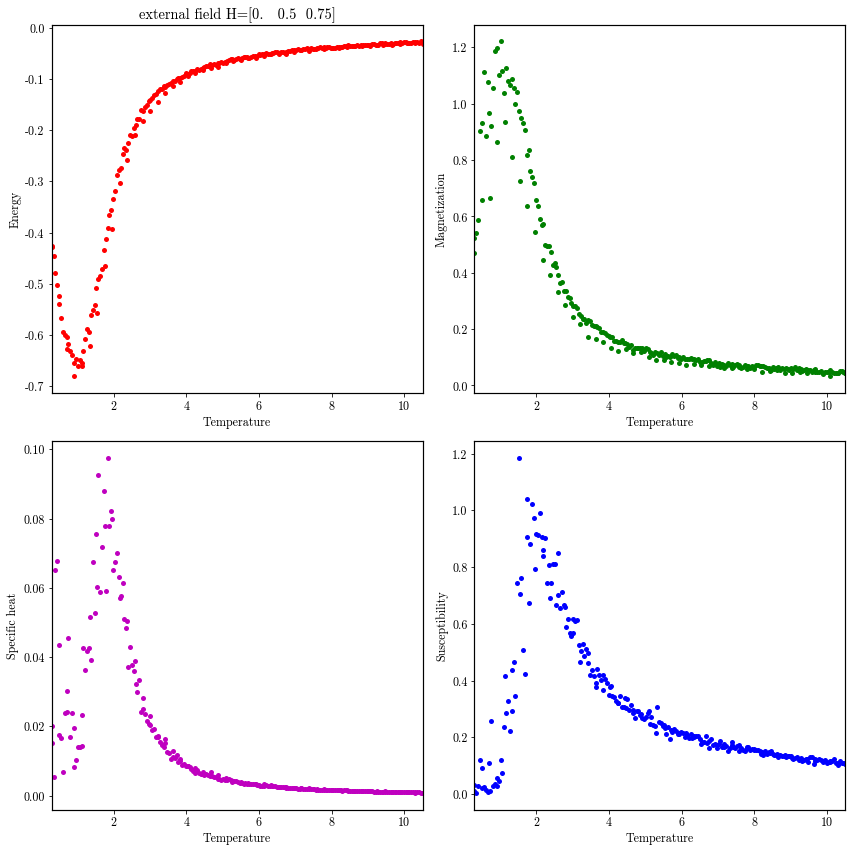

In [23]:
## then we plot a figure with energy, magnetization, specific heat and susceptibility
if len(snaps)==0:
    plt.figure(figsize=(12,12))

    plt.subplot(2,2,1)
    plt.title('external field H={}'.format(H))
    plt.plot(temp, E, 'ro', markeredgecolor='none', markersize=5)
    plt.xlabel('Temperature')
    plt.ylabel('Energy')

    plt.subplot(2,2,2)
    plt.plot(temp, M, 'go', markeredgecolor='none', markersize=5)
    plt.xlabel('Temperature')
    plt.ylabel('Magnetization')

    plt.subplot(2,2,3)
    plt.plot(temp, C, 'mo', markeredgecolor='none', markersize=5)
    plt.xlabel('Temperature')
    plt.ylabel('Specific heat')

    plt.subplot(2,2,4)
    plt.plot(temp, X, 'bo', markeredgecolor='none', markersize=5)
    plt.xlabel('Temperature')
    plt.ylabel('Susceptibility')


    plt.tight_layout()
    ## uncomment if you want to save the data
    #np.savetxt("ising_2d_{}_{}_{}.dat".format(N,steps,H), np.array([temp, E, M , C,X]).transpose())

plt.show()

### N vs. time figure
Gather all data and compare with $N$

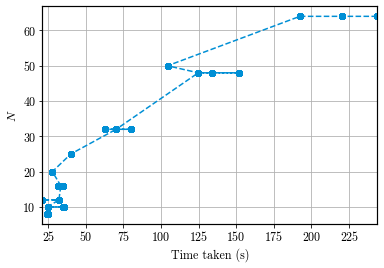

In [24]:
dfs = df.sort_values(by=['N'])
dfs['wall_time']

plt.figure()
plt.plot(dfs['wall_time'], dfs['N'], 'o--')
plt.ylabel('$N$'); plt.xlabel('Time taken (s)')

plt.grid()
plt.savefig('NvsTime.pdf')
plt.show()